In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# SVM FINAL ACC 93.75



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import joblib



In [ ]:
metadata = pd.read_csv('/content/drive/MyDrive/project/metadata.csv')
mfcc_features = pd.read_csv('/content/drive/MyDrive/project/features/mfcc.csv')

data = pd.merge(
    metadata,
    mfcc_features,
    on='file_path',
    suffixes=('_meta', '_feat')
)
print("Merged data columns:", data.columns.tolist())
data = data.rename(columns={
    'split_meta': 'split',
    'label_meta': 'label',
    'filename_meta': 'filename'
})

data = data[['file_path', 'filename', 'label', 'split'] +
           [col for col in data.columns if 'mfcc' in col or 'delta' in col or 'chroma' in col]]


train_data = data[data['split'] == 'train']
test_data = data[data['split'] == 'test']

# Prepare features and labels
X_train = train_data.drop(['file_path', 'filename', 'split', 'label'], axis=1)
y_train = train_data['label']
X_test = test_data.drop(['file_path', 'filename', 'split', 'label'], axis=1)
y_test = test_data['label']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM Classifier with class weights
svm_model = SVC(
    kernel='rbf',
    C=1.0,
    class_weight='balanced',
    probability=True,
    random_state=42
)
svm_model.fit(X_train_scaled, y_train)


Merged data columns: ['filename_meta', 'file_path', 'label_meta', 'split_meta', 'format', 'duration', 'sample_rate', 'num_channels', 'bit_depth', 'timestamp', 'notes', 'mfcc_1_mean', 'mfcc_1_std', 'mfcc_2_mean', 'mfcc_2_std', 'mfcc_3_mean', 'mfcc_3_std', 'mfcc_4_mean', 'mfcc_4_std', 'mfcc_5_mean', 'mfcc_5_std', 'mfcc_6_mean', 'mfcc_6_std', 'mfcc_7_mean', 'mfcc_7_std', 'mfcc_8_mean', 'mfcc_8_std', 'mfcc_9_mean', 'mfcc_9_std', 'mfcc_10_mean', 'mfcc_10_std', 'mfcc_11_mean', 'mfcc_11_std', 'mfcc_12_mean', 'mfcc_12_std', 'mfcc_13_mean', 'mfcc_13_std', 'mfcc_14_mean', 'mfcc_14_std', 'mfcc_15_mean', 'mfcc_15_std', 'mfcc_16_mean', 'mfcc_16_std', 'mfcc_17_mean', 'mfcc_17_std', 'mfcc_18_mean', 'mfcc_18_std', 'mfcc_19_mean', 'mfcc_19_std', 'mfcc_20_mean', 'mfcc_20_std', 'mfcc_21_mean', 'mfcc_21_std', 'mfcc_22_mean', 'mfcc_22_std', 'mfcc_23_mean', 'mfcc_23_std', 'mfcc_24_mean', 'mfcc_24_std', 'mfcc_25_mean', 'mfcc_25_std', 'mfcc_26_mean', 'mfcc_26_std', 'mfcc_27_mean', 'mfcc_27_std', 'mfcc_28_mean

SVC(class_weight='balanced', probability=True, random_state=42)

In [ ]:
joblib.dump(svm_model, '/content/drive/MyDrive/project/model/svm_baseline.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/project/model/scaler.pkl')

['/content/drive/MyDrive/project/model/scaler.pkl']

In [ ]:

test_pred = svm_model.predict(X_test_scaled)
test_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

print("\nTest Results:")
print(f"Accuracy: {accuracy_score(y_test, test_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, test_proba):.4f}")
print("Classification Report:")
print(classification_report(y_test, test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))


Test Results:
Accuracy: 0.9375
ROC AUC: 0.9916
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        80
           1       0.94      0.94      0.94        80

    accuracy                           0.94       160
   macro avg       0.94      0.94      0.94       160
weighted avg       0.94      0.94      0.94       160

Confusion Matrix:
[[75  5]
 [ 5 75]]


In [ ]:
# XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_scaled, y_train)

xgb_preds = xgb_model.predict(X_test_scaled)
xgb_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]

print("\nXGBoost Results:")
print(f"Accuracy: {accuracy_score(y_test, xgb_preds):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, xgb_probs):.4f}")
print(classification_report(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))

joblib.dump(xgb_model, '/content/drive/MyDrive/project/model/xgb_baseline.pkl')

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:36:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
Accuracy: 0.9625
ROC-AUC: 0.9948
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        80
           1       0.97      0.95      0.96        80

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160

Confusion Matrix:
 [[78  2]
 [ 4 76]]


['/content/drive/MyDrive/project/model/xgb_baseline.pkl']

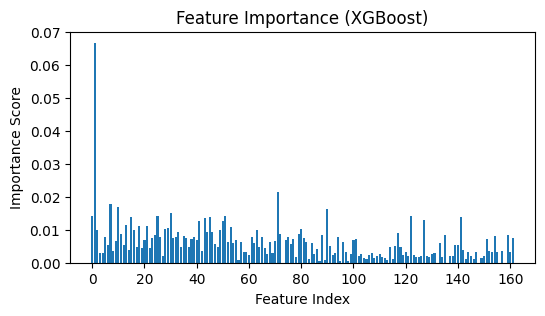

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.show()

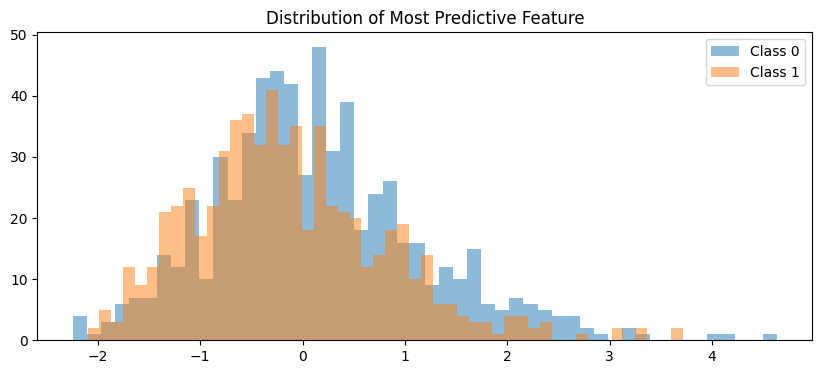

In [ ]:
# Plot distributions of the top feature
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.hist(X_train_selected[y_train == 0][:, 0], bins=50, alpha=0.5, label='Class 0')
plt.hist(X_train_selected[y_train == 1][:, 0], bins=50, alpha=0.5, label='Class 1')
plt.title("Distribution of Most Predictive Feature")
plt.legend()
plt.show()

# CNN LSTM HYBRID ACC 64%

In [5]:
!pip install keras_tuner

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import keras_tuner as kt

In [ ]:
spectogram_df = pd.read_csv('/content/drive/MyDrive/project/features/spectrogram_features/spectrogram.csv')
temporal_df = pd.read_csv('/content/drive/MyDrive/project/features/temporal_features.csv')
metadata_df = pd.read_csv('/content/drive/MyDrive/project/metadata.csv')
def convert_labels(df):
    df['label'] = df['label'].map({'real': 0, 'fake': 1})
    return df

spectogram_df = convert_labels(spectogram_df)
temporal_df = convert_labels(temporal_df)
metadata_df = convert_labels(metadata_df)

# Merge datasets by index
merged_df = pd.concat([
    spectogram_df[['file_path', 'npy_path', 'image_path', 'label', 'split']],
    temporal_df.drop(['label', 'split'], axis=1),
    metadata_df.drop(['label', 'split', 'filename', 'file_path', 'timestamp', 'notes'], axis=1)
], axis=1)

train_df = merged_df[merged_df['split'] == 'train']
test_df = merged_df[merged_df['split'] == 'test']

def load_spectrogram(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, [128, 128])
    return img/255.0

def load_sequence(npy_path):
    return np.load(npy_path).astype('float32')

def create_dataset(df):
    images = np.array([load_spectrogram(p) for p in df['image_path']])

    sequences = np.array([load_sequence(p) for p in df['npy_path']])

    # Numerical features (temporal + metadata)
    # numerical_features = df.drop([
    #     'file_path', 'npy_path', 'image_path',
    #     'label', 'split', 'format', 'duration'
    # ], axis=1).values.astype('float32')

    numerical_columns = df.select_dtypes(include=['number']).columns
    numerical_features = df[numerical_columns].values.astype('float32')

    labels = df['label'].values.astype('float32')

    return (images, sequences, numerical_features), labels

train_data = create_dataset(train_df)
test_data = create_dataset(test_df)

def build_hybrid_model():
    # Spectrogram CNN branch
    image_input = Input(shape=(128, 128, 3), name='image_input')
    x = layers.Conv2D(32, (3,3), activation='relu')(image_input)
    x = layers.MaxPooling2D(2,2)(x)
    x = layers.Conv2D(64, (3,3), activation='relu')(x)
    x = layers.GlobalAveragePooling2D()(x)

    # Temporal LSTM branch
    seq_input = Input(shape=(None, train_data[0][1].shape[-1]), name='seq_input')  # Dynamic sequence length
    y = layers.LSTM(128, return_sequences=True)(seq_input)
    y = layers.LSTM(64)(y)

    # Numerical features branch
    num_input = Input(shape=(train_data[0][2].shape[-1],), name='num_input')
    z = layers.Dense(64, activation='relu')(num_input)

    # Combine branches
    combined = layers.concatenate([x, y, z])
    dense = layers.Dense(128, activation='relu')(combined)
    dense = layers.Dropout(0.5)(dense)
    output = layers.Dense(1, activation='sigmoid')(dense)

    return Model(inputs=[image_input, seq_input, num_input], outputs=output)

model = build_hybrid_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy',
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall')]
)

history = model.fit(
    x=[train_data[0][0], train_data[0][1], train_data[0][2]],
    y=train_data[1],
    epochs=15,
    batch_size=32,
    validation_data=([test_data[0][0], test_data[0][1], test_data[0][2]], test_data[1]),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=2)
    ]
)

results = model.evaluate(
    [test_data[0][0], test_data[0][1], test_data[0][2]],
    test_data[1],
    verbose=0
)

# print(f"Test Accuracy: {results[1]:.4f}")
# print(f"Test Precision: {results[2]:.4f}")
# print(f"Test Recall: {results[3]:.4f}")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-3a3483e7d66b>", line 49, in <cell line: 0>
    train_data = create_dataset(train_df)
                 ^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-3-3a3483e7d66b>", line 32, in create_dataset
    images = np.array([load_spectrogram(p) for p in df['image_path']])
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-3-3a3483e7d66b>", line 32, in <listcomp>
    images = np.array([load_spectrogram(p) for p in df['image_path']])
                       ^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-3-3a3483e7d66b>", line 23, in load_spectrogram
    img = tf.io.read_file(image_path)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/io_ops.py", line 134, in read_file
    return gen_

TypeError: object of type 'NoneType' has no len()

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 784ms/step
Classification Report:

              precision    recall  f1-score   support

        Real       0.72      0.47      0.57        80
        Fake       0.61      0.81      0.70        80

    accuracy                           0.64       160
   macro avg       0.66      0.64      0.63       160
weighted avg       0.66      0.64      0.63       160

Test Accuracy: 64.38%


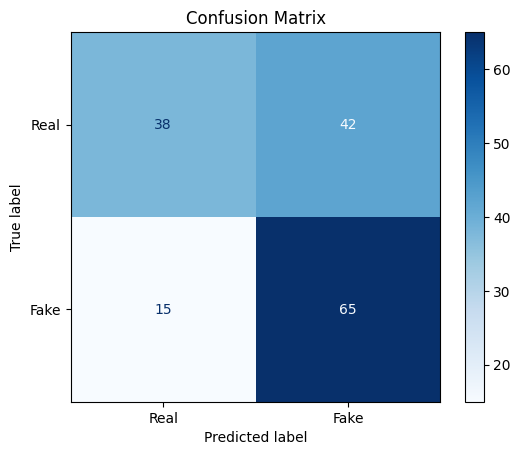

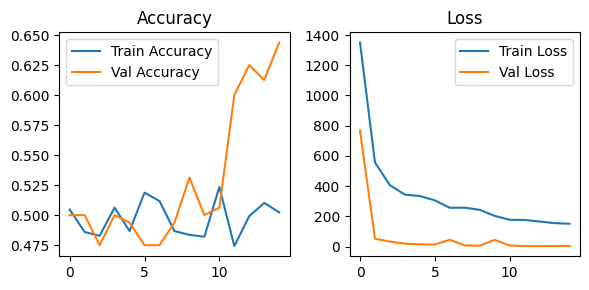

In [ ]:
# Evaluation
pred_probs = model.predict([test_data[0][0], test_data[0][1], test_data[0][2]])
pred_labels = (pred_probs.flatten() > 0.5).astype(int)

print("Classification Report:\n")
print(classification_report(test_data[1], pred_labels, target_names=['Real', 'Fake']))


test_acc = np.mean(pred_labels == test_data[1])
print(f"Test Accuracy: {test_acc*100:.2f}%")


cm = confusion_matrix(test_data[1], pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/project/model/hybrid_deepfake_detector.keras')

In [ ]:
model_save_path = '/content/drive/MyDrive/project/model/cnn_lstm.h5'
model.save(model_save_path)
print(f"Model saved at: {model_save_path}")

Model saved at: /content/drive/MyDrive/project/model/cnn_lstm.h5


In [8]:
spectogram_df = pd.read_csv('/content/drive/MyDrive/project/features/spectrogram_features/spectrogram.csv')
temporal_df = pd.read_csv('/content/drive/MyDrive/project/features/temporal_features.csv')
metadata_df = pd.read_csv('/content/drive/MyDrive/project/metadata.csv')
def convert_labels(df):
    df['label'] = df['label'].map({'real': 0, 'fake': 1})
    return df

spectogram_df = convert_labels(spectogram_df)
temporal_df = convert_labels(temporal_df)
metadata_df = convert_labels(metadata_df)

# Merge datasets by index
merged_df = pd.concat([
    spectogram_df[['file_path', 'npy_path', 'image_path', 'label', 'split']],
    temporal_df.drop(['label', 'split'], axis=1),
    metadata_df.drop(['label', 'split', 'filename', 'file_path', 'timestamp', 'notes'], axis=1)
], axis=1)

train_df = merged_df[merged_df['split'] == 'train']
test_df = merged_df[merged_df['split'] == 'test']

def load_spectrogram(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, [128, 128])
    return img/255.0

def load_sequence(npy_path):
    return np.load(npy_path).astype('float32')

def create_dataset(df):
    images = np.array([load_spectrogram(p) for p in df['image_path']])

    sequences = np.array([load_sequence(p) for p in df['npy_path']])

    # Numerical features (temporal + metadata)
    # numerical_features = df.drop([
    #     'file_path', 'npy_path', 'image_path',
    #     'label', 'split', 'format', 'duration'
    # ], axis=1).values.astype('float32')

    numerical_columns = df.select_dtypes(include=['number']).columns
    numerical_features = df[numerical_columns].values.astype('float32')

    labels = df['label'].values.astype('float32')

    return (images, sequences, numerical_features), labels

train_data = create_dataset(train_df)
test_data = create_dataset(test_df)

# def build_hybrid_model():
#     # Spectrogram CNN branch
#     image_input = Input(shape=(128, 128, 3), name='image_input')
#     x = layers.Conv2D(32, (3,3), activation='relu')(image_input)
#     x = layers.MaxPooling2D(2,2)(x)
#     x = layers.Conv2D(64, (3,3), activation='relu')(x)
#     x = layers.GlobalAveragePooling2D()(x)

#     # Temporal LSTM branch
#     seq_input = Input(shape=(None, train_data[0][1].shape[-1]), name='seq_input')  # Dynamic sequence length
#     y = layers.LSTM(128, return_sequences=True)(seq_input)
#     y = layers.LSTM(64)(y)

#     # Numerical features branch
#     num_input = Input(shape=(train_data[0][2].shape[-1],), name='num_input')
#     z = layers.Dense(64, activation='relu')(num_input)

#     # Combine branches
#     combined = layers.concatenate([x, y, z])
#     dense = layers.Dense(128, activation='relu')(combined)
#     dense = layers.Dropout(0.5)(dense)
#     output = layers.Dense(1, activation='sigmoid')(dense)

#     return Model(inputs=[image_input, seq_input, num_input], outputs=output)

# model = build_hybrid_model()
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
#     loss='binary_crossentropy',
#     metrics=['accuracy',
#              tf.keras.metrics.Precision(name='precision'),
#              tf.keras.metrics.Recall(name='recall')]
# )

# history = model.fit(
#     x=[train_data[0][0], train_data[0][1], train_data[0][2]],
#     y=train_data[1],
#     epochs=15,
#     batch_size=32,
#     validation_data=([test_data[0][0], test_data[0][1], test_data[0][2]], test_data[1]),
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(patience=3),
#         tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=2)
#     ]
# )

# results = model.evaluate(
#     [test_data[0][0], test_data[0][1], test_data[0][2]],
#     test_data[1],
#     verbose=0
# )


import keras_tuner as kt


def build_hybrid_model(hp):
    # Spectrogram CNN branch
    image_input = Input(shape=(128, 128, 3), name='image_input')

    # Tunable CNN architecture
    x = layers.Conv2D(
        filters=hp.Int('conv1_filters', 32, 128, step=32),
        kernel_size=(3,3),
        activation='relu'
    )(image_input)
    x = layers.MaxPooling2D(2,2)(x)
    x = layers.Conv2D(
        filters=hp.Int('conv2_filters', 64, 256, step=64),
        kernel_size=(3,3),
        activation='relu'
    )(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(hp.Float('cnn_dropout', 0.3, 0.7))(x)

    # Temporal LSTM branch
    seq_input = Input(shape=(None, train_data[0][1].shape[-1]), name='seq_input')
    y = layers.LSTM(
        units=hp.Int('lstm1_units', 64, 256, step=64),
        return_sequences=True
    )(seq_input)
    y = layers.LSTM(
        units=hp.Int('lstm2_units', 32, 128, step=32)
    )(y)
    y = layers.Dropout(hp.Float('lstm_dropout', 0.3, 0.7))(y)

    num_input = Input(shape=(train_data[0][2].shape[-1],), name='num_input')
    z = layers.Dense(
        units=hp.Int('dense_units', 32, 128, step=32),
        activation='relu'
    )(num_input)
    z = layers.BatchNormalization()(z)

    combined = layers.concatenate([x, y, z])
    dense = layers.Dense(
        units=hp.Int('combined_units', 64, 256, step=64),
        activation='relu',
        kernel_regularizer=tf.keras.regularizers.l2(hp.Float('l2_reg', 1e-5, 1e-3))
    )(combined)
    dense = layers.Dropout(hp.Float('final_dropout', 0.3, 0.7))(dense)
    output = layers.Dense(1, activation='sigmoid')(dense)

    model = Model(inputs=[image_input, seq_input, num_input], outputs=output)

    # Tunable learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Choice('learning_rate', [1e-3, 1e-4, 1e-5])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    return model

tuner = kt.Hyperband(
    build_hybrid_model,
    objective=kt.Objective("val_auc", direction="max"),
    max_epochs=20,
    factor=3,
    directory='tuning_dir',
    project_name='deepfake_tuning',
    overwrite=True
)

tuner.search(
    x=[train_data[0][0], train_data[0][1], train_data[0][2]],
    y=train_data[1],
    epochs=50,
    batch_size=64,
    validation_data=([test_data[0][0], test_data[0][1], test_data[0][2]], test_data[1]),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5),
        tf.keras.callbacks.TerminateOnNaN()
    ]
)

best_model = tuner.get_best_models(num_models=1)[0]

test_loss, test_acc, test_auc = best_model.evaluate(
    [test_data[0][0], test_data[0][1], test_data[0][2]],
    test_data[1]
)

print(f"\nBest Model Test Results:")
print(f"Accuracy: {test_acc:.4f}")
print(f"AUC: {test_auc:.4f}")


Trial 21 Complete [00h 17m 08s]
val_auc: 0.5564843416213989

Best val_auc So Far: 0.9453907012939453
Total elapsed time: 03h 52m 25s

Search: Running Trial #22

Value             |Best Value So Far |Hyperparameter
96                |96                |conv1_filters
256               |256               |conv2_filters
0.30275           |0.36509           |cnn_dropout
128               |192               |lstm1_units
96                |96                |lstm2_units
0.45217           |0.43224           |lstm_dropout
128               |32                |dense_units
128               |256               |combined_units
0.00050623        |0.00051702        |l2_reg
0.47803           |0.68997           |final_dropout
0.0001            |0.001             |learning_rate
7                 |20                |tuner/epochs
0                 |7                 |tuner/initial_epoch
1                 |2                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/7


KeyboardInterrupt: 

In [9]:
best_model = tuner.get_best_models(num_models=1)[0]

test_loss, test_acc, test_auc = best_model.evaluate(
    [test_data[0][0], test_data[0][1], test_data[0][2]],
    test_data[1]
)

print(f"\nBest Model Test Results:")
print(f"Accuracy: {test_acc:.4f}")
print(f"AUC: {test_auc:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.7799 - auc: 0.9463 - loss: 0.4922

Best Model Test Results:
Accuracy: 0.7875
AUC: 0.9454


5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step

Classification Report:
              precision    recall  f1-score   support

        Real       0.71      0.97      0.82        80
        Fake       0.96      0.60      0.74        80

    accuracy                           0.79       160
   macro avg       0.83      0.79      0.78       160
weighted avg       0.83      0.79      0.78       160



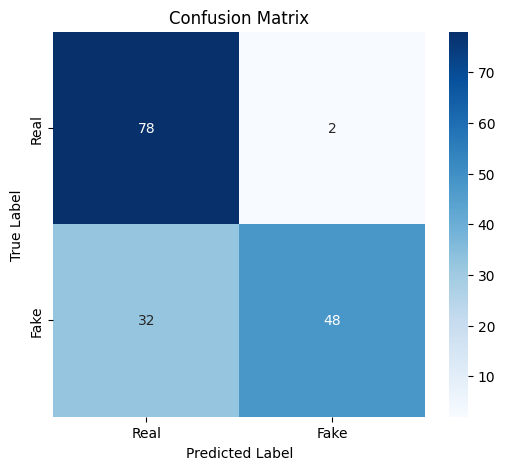

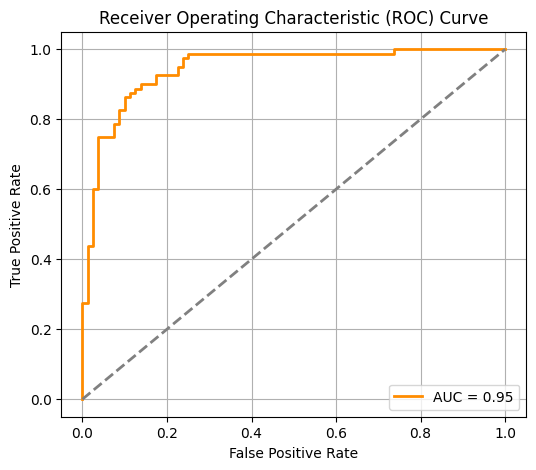

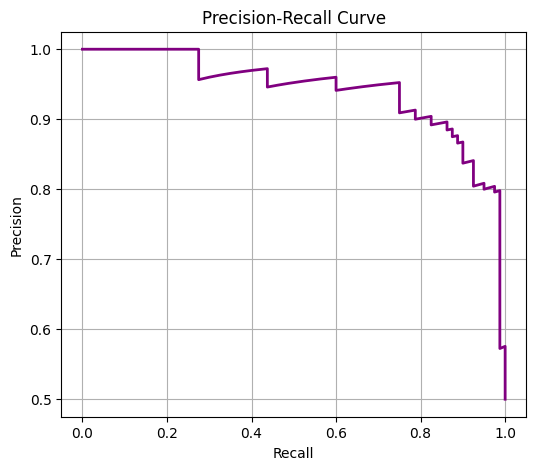

In [10]:
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_true = test_data[1]
y_pred_probs = best_model.predict([test_data[0][0], test_data[0][1], test_data[0][2]])
y_pred = (y_pred_probs > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Real', 'Fake']))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

precision, recall, _ = precision_recall_curve(y_true, y_pred_probs)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/project/model/hybrid.keras')

In [ ]:
model_save_path = '/content/drive/MyDrive/project/model/hybrid.h5'
model.save(model_save_path)
print(f"Model saved at: {model_save_path}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step
Classification Report:

              precision    recall  f1-score   support

        Real       0.51      0.72      0.60        80
        Fake       0.53      0.31      0.39        80

    accuracy                           0.52       160
   macro avg       0.52      0.52      0.50       160
weighted avg       0.52      0.52      0.50       160

Test Accuracy: 51.88%


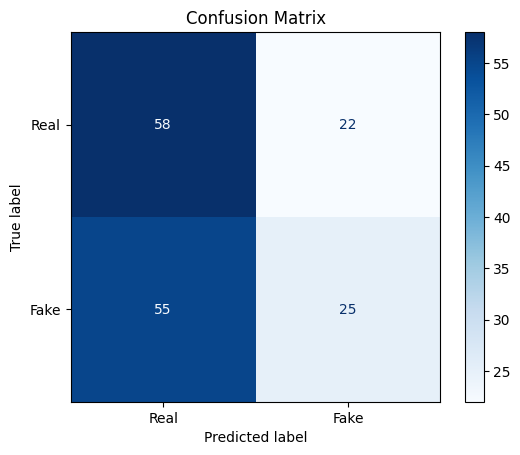

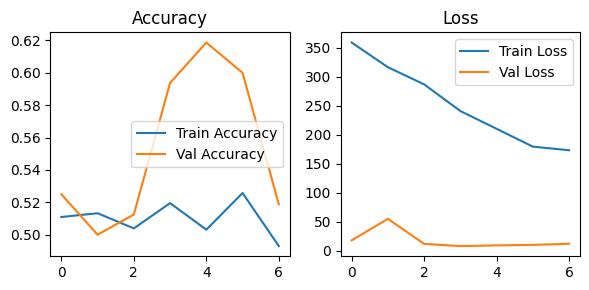

In [ ]:
pred_probs = model.predict([test_data[0][0], test_data[0][1], test_data[0][2]])
pred_labels = (pred_probs.flatten() > 0.5).astype(int)

print("Classification Report:\n")
print(classification_report(test_data[1], pred_labels, target_names=['Real', 'Fake']))


test_acc = np.mean(pred_labels == test_data[1])
print(f"Test Accuracy: {test_acc*100:.2f}%")


cm = confusion_matrix(test_data[1], pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()

# CNN with all features acc 53

In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_auc_score)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import keras_tuner as kt

In [ ]:
metadata_df = pd.read_csv('/content/drive/MyDrive/project/metadata.csv')
acoustic_features = pd.read_csv('/content/drive/MyDrive/project/features/acoustic_features.csv').select_dtypes(include=np.number)
temporal_features = pd.read_csv('/content/drive/MyDrive/project/features/temporal_features.csv').select_dtypes(include=np.number)
wav2vec2_embeddings = pd.read_csv('/content/drive/MyDrive/project/features/wav2vec2_embeddings/wav2vec_metadata.csv').select_dtypes(include=np.number)
X = np.concatenate([
    acoustic_features.values,
    temporal_features.values,
    wav2vec2_embeddings
], axis=1)

y = metadata_df['label'].values

split_mask = {
    'train': metadata_df['split'] == 'train',
    'val': metadata_df['split'] == 'val',
    'test': metadata_df['split'] == 'test'
}

X_train, y_train = X[split_mask['train']], y[split_mask['train']]
X_val, y_val = X[split_mask['val']], y[split_mask['val']]
X_test, y_test = X[split_mask['test']], y[split_mask['test']]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

input_shape = (X_train_scaled.shape[1], 1)
X_train_reshaped = X_train_scaled.reshape((-1,) + input_shape)
X_val_reshaped = X_val_scaled.reshape((-1,) + input_shape)
X_test_reshaped = X_test_scaled.reshape((-1,) + input_shape)

def model_builder(hp):
    model = models.Sequential()

    for i in range(hp.Int('num_conv_layers', 1, 3)):
        model.add(layers.Conv1D(
            filters=hp.Int(f'filters_{i}', 32, 256, step=32),
            kernel_size=hp.Int(f'kernel_{i}', 3, 7),
            activation='relu',
            input_shape=input_shape if i == 0 else None
        ))
        model.add(layers.MaxPooling1D(
            pool_size=hp.Int(f'pool_{i}', 2, 3))
        )
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(
            hp.Float(f'dropout_conv_{i}', 0.0, 0.5, step=0.1))
        )

    model.add(layers.GlobalAveragePooling1D())

    for j in range(hp.Int('num_dense_layers', 1, 2)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{j}', 64, 256, step=64),
            activation='relu'
        ))
        model.add(layers.Dropout(
            hp.Float(f'dropout_dense_{j}', 0.0, 0.5, step=0.1))
        )

    model.add(layers.Dense(1, activation='sigmoid'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    return model

tuner = kt.RandomSearch(
    model_builder,
    objective=kt.Objective("val_auc", direction="max"),
    max_trials=15,
    executions_per_trial=1,
    directory='tuning',
    project_name='audio_deepfake_cnn'
)

tuner_early_stop = EarlyStopping(
    monitor='val_auc',
    patience=3,
    mode='max'
)

print("\nStarting hyperparameter tuning...")
tuner.search(
    X_train_reshaped, y_train,
    epochs=30,
    validation_data=(X_val_reshaped, y_val),
    callbacks=[tuner_early_stop],
    batch_size=128
)

Trial 5 Complete [00h 00m 01s]

Best val_auc So Far: 1.0
Total elapsed time: 00h 00m 32s

Search: Running Trial #6

Value             |Best Value So Far |Hyperparameter
3                 |2                 |num_conv_layers
256               |64                |filters_0
3                 |5                 |kernel_0
2                 |3                 |pool_0
0.2               |0.3               |dropout_conv_0
1                 |2                 |num_dense_layers
192               |128               |units_0
0.1               |0.2               |dropout_dense_0
0.0001            |0.001             |learning_rate
192               |32                |filters_1
5                 |3                 |kernel_1
2                 |2                 |pool_1
0.4               |0                 |dropout_conv_1
128               |64                |units_1
0.2               |0                 |dropout_dense_1



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 232, in _build_and_fit_model
    model = self._try_build(hp)
            ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 164, in _try_b

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 232, in _build_and_fit_model
    model = self._try_build(hp)
            ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 164, in _try_build
    model = self._build_hypermodel(hp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras_tuner/src/engine/tuner.py", line 155, in _build_hypermodel
    model = self.hypermodel.build(hp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-7-86bea73700f2>", line 41, in model_builder
    model.add(layers.Conv1D(
  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/sequential.py", line 122, in add
    self._maybe_rebuild()
  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/sequential.py", line 141, in _maybe_rebuild
    self.build(input_shape)
  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 228, in build_wrapper
    original_build_method(*args, **kwargs)
  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/sequential.py", line 187, in build
    x = layer(x)
        ^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation_utils.py", line 221, in compute_conv_output_shape
    raise ValueError(
ValueError: Computed output size would be negative. Received `inputs shape=(None, 1, 192)`, `kernel shape=(3, 192, 32)`, `dilation_rate=[1]`.


In [ ]:
# Get optimal hyperparameters
best_hp = tuner.get_best_hyperparameters()[0]
print("\nBest Hyperparameters:")
print(best_hp.values)

best_model = tuner.hypermodel.build(best_hp)

final_callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_cnn_model.h5', save_best_only=True, monitor='val_auc')
]

print("\nTraining final model...")
history = best_model.fit(
    X_train_reshaped, y_train,
    validation_data=(X_val_reshaped, y_val),
    epochs=100,
    batch_size=128,
    callbacks=final_callbacks
)


Best Hyperparameters:
{'num_conv_layers': 1, 'filters_0': 256, 'kernel_0': 4, 'pool_0': 2, 'dropout_conv_0': 0.1, 'num_dense_layers': 1, 'units_0': 256, 'dropout_dense_0': 0.2, 'learning_rate': 0.001, 'filters_1': 192, 'kernel_1': 6, 'pool_1': 2, 'dropout_conv_1': 0.30000000000000004, 'units_1': 256, 'dropout_dense_1': 0.0, 'filters_2': 224, 'kernel_2': 6, 'pool_2': 2, 'dropout_conv_2': 0.4}

Training final model...
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.5443 - auc: 0.5689 - loss: 0.6710

10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 368ms/step - accuracy: 0.5470 - auc: 0.5748 - loss: 0.6690 - val_accuracy: 0.5875 - val_auc: 0.6766 - val_loss: 0.6846
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 214ms/step - accuracy: 0.6797 - auc: 0.7483 - loss: 0.6056 - val_accuracy: 0.6125 - val_auc: 0.7034 - val_loss: 0.6835
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.7544 - auc: 0.8232 - loss: 0.5492 - val_accuracy: 0.5000 - val_auc: 0.7653 - val_loss: 0.6849
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - accuracy: 0.7732 - auc: 0.8568 - loss: 0.5134 - val_accuracy: 0.5000 - val_auc: 0.7716 - val_loss: 0.6853
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.8076 - auc: 0.8952 - loss: 0.4682 - val_accuracy: 0.5000 - val_auc: 0.8130 - val_loss: 0.7036
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.8221 - auc: 0.9032 - loss: 0.4365 - val_accuracy: 0.5000 - val_auc: 0.8059 - val_loss: 0.7090
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 183m

In [ ]:
final_model = models.load_model('best_cnn_model.h5')

def evaluate_model(model, X, y, set_name):
    y_pred = (model.predict(X) > 0.5).astype(int)
    y_proba = model.predict(X)

    print(f"\n{set_name} Results:")
    print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y, y_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y, y_pred))

evaluate_model(final_model, X_train_reshaped, y_train, "Training")
evaluate_model(final_model, X_val_reshaped, y_val, "Validation")
evaluate_model(final_model, X_test_reshaped, y_test, "Test")


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Training Results:
Accuracy: 0.5727
ROC AUC: 0.6743
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.31      0.42       640
           1       0.55      0.84      0.66       640

    accuracy                           0.57      1280
   macro avg       0.60      0.57      0.54      1280
weighted avg       0.60      0.57      0.54      1280

Confusion Matrix:
[[198 442]
 [105 535]]
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Validation Results:
Accuracy: 0.5875
ROC AUC: 0.6783
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.34      0.45        80
           1       0.56      0.84      0.67        80

    accuracy                           0.59       160
   macro avg       0.62      0.59      0.56       160
weighted avg       0.62      0.59      0.56       160


In [ ]:
final_model.save('/content/drive/MyDrive/project/model/final_cnn_model.h5')
print("/content/drive/MyDrive/project/model/Model saved successfully!")

/content/drive/MyDrive/project/model/Model saved successfully!


# CNN FOR spectral and spectrogram featrures

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

metadata_df = pd.read_csv('/content/drive/MyDrive/project/metadata.csv')
spectral_df = pd.read_csv('/content/drive/MyDrive/project/Spectral.csv')
spectrogram_df = pd.read_csv('/content/drive/MyDrive/project/spectrogram.csv')

merged_df = pd.merge(
    pd.merge(
        metadata_df,
        spectral_df.drop(['split'], axis=1),  # Remove duplicate split column
        on='label'
    ),
    spectrogram_df.drop(['split', 'label'], axis=1),
    left_on='file_path',
    right_on='original_path'
)

temporal_features = np.array([np.load(path) for path in merged_df['npy_path']])

X = np.concatenate([
    merged_df.select_dtypes(include=np.number).drop(['label', 'split'], axis=1).values,
    temporal_features.reshape(temporal_features.shape[0], -1)  # Flatten temporal features
], axis=1)

y = merged_df['label'].values

split_mask = {
    'train': merged_df['split'] == 'train',
    'val': merged_df['split'] == 'val',
    'test': merged_df['split'] == 'test'
}

X_train, y_train = X[split_mask['train']], y[split_mask['train']]
X_val, y_val = X[split_mask['val']], y[split_mask['val']]
X_test, y_test = X[split_mask['test']], y[split_mask['test']]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

input_shape = (X_train_scaled.shape[1], 1)
X_train_reshaped = X_train_scaled.reshape((-1,) + input_shape)
X_val_reshaped = X_val_scaled.reshape((-1,) + input_shape)
X_test_reshaped = X_test_scaled.reshape((-1,) + input_shape)

def model_builder(hp):
    model = models.Sequential()

    for i in range(hp.Int('num_conv_layers', 1, 3)):
        model.add(layers.Conv1D(
            hp.Int(f'filters_{i}', 32, 256, step=32),
            kernel_size=hp.Int(f'kernel_{i}', 3, 7),
            activation='relu',
            input_shape=input_shape if i == 0 else None
        ))
        model.add(layers.MaxPooling1D(
            hp.Int(f'pool_size_{i}', 2, 3)
        ))
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(
            hp.Float(f'dropout_conv_{i}', 0.0, 0.5, step=0.1)
        ))

    model.add(layers.GlobalAveragePooling1D())

    for j in range(hp.Int('num_dense_layers', 1, 2)):
        model.add(layers.Dense(
            hp.Int(f'units_{j}', 64, 256, step=64),
            activation='relu'
        ))
        model.add(layers.Dropout(
            hp.Float(f'dropout_dense_{j}', 0.0, 0.5, step=0.1)
        ))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    return model

tuner = kt.RandomSearch(
    model_builder,
    objective=kt.Objective("val_auc", direction="max"),
    max_trials=15,
    executions_per_trial=1,
    directory='tuning',
    project_name='audio_deepfake'
)

early_stop = EarlyStopping(
    monitor='val_auc',
    patience=5,
    mode='max',
    restore_best_weights=True
)

tuner.search(
    X_train_reshaped, y_train,
    epochs=30,
    validation_data=(X_val_reshaped, y_val),
    callbacks=[early_stop],
    batch_size=128
)

best_hp = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(best_hp)

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_auc',
    save_best_only=True,
    mode='max'
)

history = model.fit(
    X_train_reshaped, y_train,
    validation_data=(X_val_reshaped, y_val),
    epochs=100,
    batch_size=128,
    callbacks=[early_stop, checkpoint]
)

final_model = models.load_model('best_model.h5')

def evaluate_model(model, X, y, set_name):
    y_pred = (model.predict(X) > 0.5).astype(int)
    y_proba = model.predict(X)

    print(f"\n{set_name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y, y_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y, y_pred))

evaluate_model(final_model, X_train_reshaped, y_train, "Training")
evaluate_model(final_model, X_val_reshaped, y_val, "Validation")
evaluate_model(final_model, X_test_reshaped, y_test, "Test")

# SVM RAW MODEL ACC 0.1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_auc_score)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
import joblib

In [ ]:
metadata_df = pd.read_csv('/content/drive/MyDrive/project/metadata.csv')
acoustic_features = pd.read_csv('/content/drive/MyDrive/project/features/acoustic_features.csv').select_dtypes(include=np.number)
temporal_features = pd.read_csv('/content/drive/MyDrive/project/features/cleaned_temporal_prosodic_features.csv').select_dtypes(include=np.number)
wav2vec2_embeddings = pd.read_csv('/content/drive/MyDrive/project/features/wav2vec2_embeddings/wav2vec_metadata.csv').select_dtypes(include=np.number)
X = np.concatenate([
    acoustic_features.values,
    temporal_features.values,
    wav2vec2_embeddings.values
], axis=1)

y = metadata_df['label'].values

split_mask = {
    'train': metadata_df['split'] == 'train',
    'val': metadata_df['split'] == 'val',
    'test': metadata_df['split'] == 'test'
}

X_train, y_train = X[split_mask['train']], y[split_mask['train']]
X_val, y_val = X[split_mask['val']], y[split_mask['val']]
X_test, y_test = X[split_mask['test']], y[split_mask['test']]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

selector = SelectKBest(f_classif, k=195)  # Select top 100 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_val_selected = selector.transform(X_val_scaled)
X_test_selected = selector.transform(X_test_scaled)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(
    estimator=SVC(
        class_weight='balanced',
        probability=True,
        random_state=42
    ),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_selected, y_train)

best_svm = grid_search.best_estimator_

print("Train features:", X_train_selected.shape[1])
print("Validation features:", X_val_selected.shape[1])
print("Model expects:", svm_model.n_features_in_)

svm_model = SVC(**grid_search.best_params_,
               class_weight='balanced',
               probability=True,
               random_state=42
)
svm_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Train features: 195
Validation features: 195
Model expects: 195


SVC(C=0.1, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000).fit(X_train_selected, y_train)
print("LogReg Test Accuracy:", lr.score(X_test_selected, y_test))

In [ ]:
# Validation evaluation
val_pred = svm_model.predict(X_val_selected)
val_proba = svm_model.predict_proba(X_val_selected)[:, 1]

print("Validation Results:")
print(f"Accuracy: {accuracy_score(y_val, val_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_val, val_proba):.4f}")
print("Classification Report:")
print(classification_report(y_val, val_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, val_pred))

Validation Results:
Accuracy: 1.0000
ROC AUC: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        80

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

Confusion Matrix:
[[80  0]
 [ 0 80]]


In [ ]:
# Test evaluation
test_pred = svm_model.predict(X_test_selected)
test_proba = svm_model.predict_proba(X_test_selected)[:, 1]

print("\nTest Results:")
print(f"Accuracy: {accuracy_score(y_test, test_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, test_proba):.4f}")
print("Classification Report:")
print(classification_report(y_test, test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))



Test Results:
Accuracy: 1.0000
ROC AUC: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        80

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160

Confusion Matrix:
[[80  0]
 [ 0 80]]


In [ ]:
joblib.dump(selector, '/content/drive/MyDrive/project/model/feature_selector.pkl')
joblib.dump(svm_model, '/content/drive/MyDrive/project/model/svm_baseline_model.pkl')
joblib.dump(scaler, '/content/drive/MyDrive/project/model/scaler.pkl')

In [ ]:
selected_features = np.array(acoustic_features.columns.tolist() +
                             temporal_features.columns.tolist() +
                             wav2vec2_embeddings.columns.tolist()
                            )[selector.get_support()]
print("Top 10 features:\n", selected_features[:10])

Top 10 features:
 ['zcr_mean' 'rms_mean' 'spectral_centroid_mean' 'spectral_centroid_std'
 'spectral_bandwidth_mean' 'spectral_bandwidth_std'
 'spectral_rolloff_mean' 'spectral_rolloff_std' 'mfcc_1_mean' 'mfcc_1_std']


In [ ]:
# 1. Verify data splitting
print("Test samples in training set:", sum(metadata_df[split_mask['test']].index.isin(metadata_df[split_mask['train']].index)))

# 2. Check feature-target correlation
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X_test_selected, y_test)
print("Max mutual info:", max(mi_scores))  # Should be <1 for real data

# 3. Validate model generalization
# Train on small subset
sample_model = SVC().fit(X_train_selected[:100], y_train[:100])
print("Subset test accuracy:", sample_model.score(X_test_selected, y_test))  # Should NOT be 1.0

Test samples in training set: 0
Max mutual info: 0.6962819459942253
Subset test accuracy: 0.96875


In [ ]:
# Check if scaling was applied CORRECTLY (after splitting)
assert np.allclose(X_train_scaled.mean(axis=0), 0, atol=1e-2), "Scaling leaked train data!"
assert np.allclose(X_train_scaled.std(axis=0), 1, atol=1e-2), "Scaling used wrong std!"

# CNNLSTM